In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [22]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Multi Linear Regression

08-01-2022  21:32    <DIR>          .
08-01-2022  21:46    <DIR>          ..
08-01-2022  00:25    <DIR>          .ipynb_checkpoints
06-01-2022  22:13             2,436 50_Startups.csv
08-01-2022  21:32         2,300,940 Multiple Linear Regression.ipynb
06-01-2022  22:13               468 proble_statement(50_startups).txt
06-01-2022  22:13             1,752 Toyota Corolla.txt
06-01-2022  22:13           224,041 ToyotaCorolla.csv
               5 File(s)      2,529,637 bytes
               3 Dir(s)  211,586,363,392 bytes free


## 50 Startups

In [23]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
startups1 = startups.rename({'R&D Spend':'RandDSpend', 'Marketing Spend':'MarketingSpend'},axis = 1)

In [25]:
startups1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
startups1.isna().sum()

RandDSpend        0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

### Correlation Matrix

In [27]:
startups1.corr()

,RandDSpend,Administration,MarketingSpend,Profit
RandDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


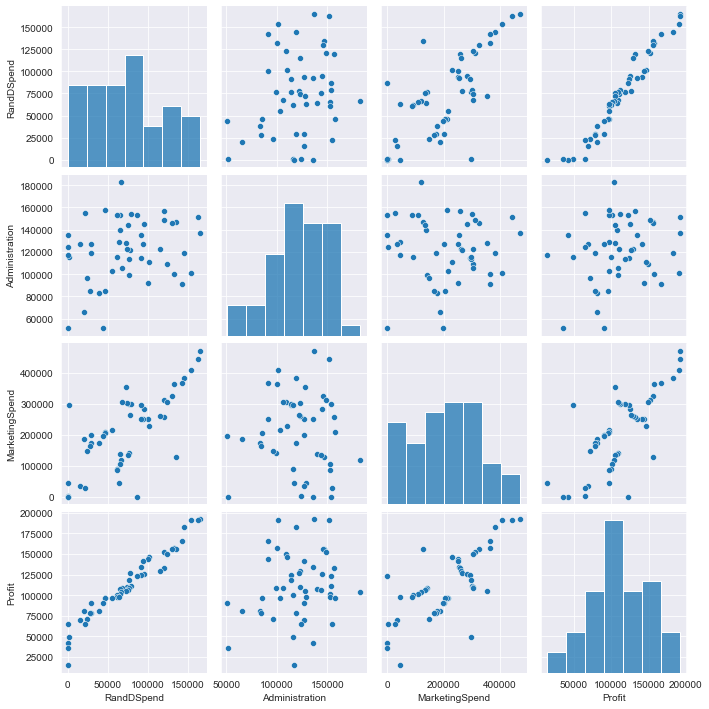

In [28]:
sns.set_style(style = 'darkgrid')
sns.pairplot(startups1)

### Preparing a model

In [29]:
startups1_model = smf.ols('Profit~RandDSpend+Administration+MarketingSpend', data = startups1).fit()
startups1_model.rsquared

0.9507459940683246

In [30]:
startups1_model.params

Intercept         50122.192990
RandDSpend            0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [31]:
print(startups1_model.tvalues, '\n', startups1_model.pvalues)

Intercept          7.626218
RandDSpend        17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RandDSpend        2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [32]:
startups1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        21:55:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandDSpend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression Models

In [33]:
sm_A = smf.ols('Profit~Administration', data = startups1).fit()
print(sm_A.tvalues, '\n', sm_A.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [34]:
sm_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 08 Jan 2022   Prob (F-statistic):              0.162
Time:                        21:55:19   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
sm_MSA = smf.ols('Profit~MarketingSpend+Administration', data = startups1).fit()
print(sm_MSA.tvalues, '\n', sm_MSA.pvalues)

Intercept         1.142741
MarketingSpend    8.281039
Administration    2.467779
dtype: float64 
 Intercept         2.589341e-01
MarketingSpend    9.727245e-11
Administration    1.729198e-02
dtype: float64


In [36]:
sm_MSA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           2.50e-10
Time:                        21:55:20   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
sm_RDA = smf.ols('Profit~RandDSpend+Administration', data = startups1).fit()
print(sm_RDA.tvalues, '\n', sm_RDA.pvalues)

Intercept          9.122352
RandDSpend        28.588870
Administration    -1.072677
dtype: float64 
 Intercept         5.695336e-12
RandDSpend        2.278348e-31
Administration    2.888932e-01
dtype: float64


In [38]:
sm_RDA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           7.29e-31
Time:                        21:55:21   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RandDSpend         0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF

In [39]:
rsq_RD = smf.ols('RandDSpend~Administration+MarketingSpend', data = startups1).fit().rsquared
vif_RD = 1/(1-rsq_RD)

rsq_A = smf.ols('Administration~RandDSpend+MarketingSpend', data = startups1).fit().rsquared
vif_A = 1/(1-rsq_A)

rsq_MS = smf.ols('MarketingSpend~Administration+RandDSpend', data = startups1).fit().rsquared
vif_MS = 1/(1-rsq_MS)

d1 = {'Variables':['R&D Spend', 'Administration', 'Marketing Spend'], 'VIF':[vif_RD, vif_A, vif_MS]}
VIF_frame = pd.DataFrame(d1)
VIF_frame

,Variables,VIF
0,R&D Spend,2.468903
1,Administration,1.175091
2,Marketing Spend,2.326773


### Residual Analysis

#### QQ Plot

In [20]:
import statsmodels.api as sm

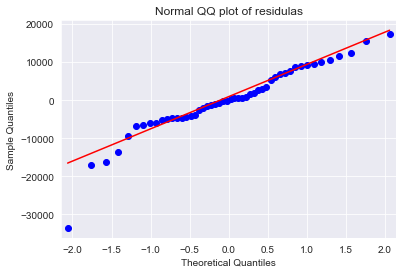

In [21]:
qqplot = sm.qqplot(startups1_model.resid, line = 'q')
plt.title("Normal QQ plot of residulas")
plt.show()

#### Homoscadasticity

In [22]:
def get_standard_values( vals ):
    return(vals - vals.mean())/vals.std()

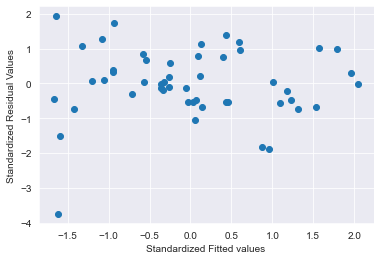

In [23]:
plt.scatter(get_standard_values(startups1_model.fittedvalues),get_standard_values(startups1_model.resid))
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### Residual vs Regressors

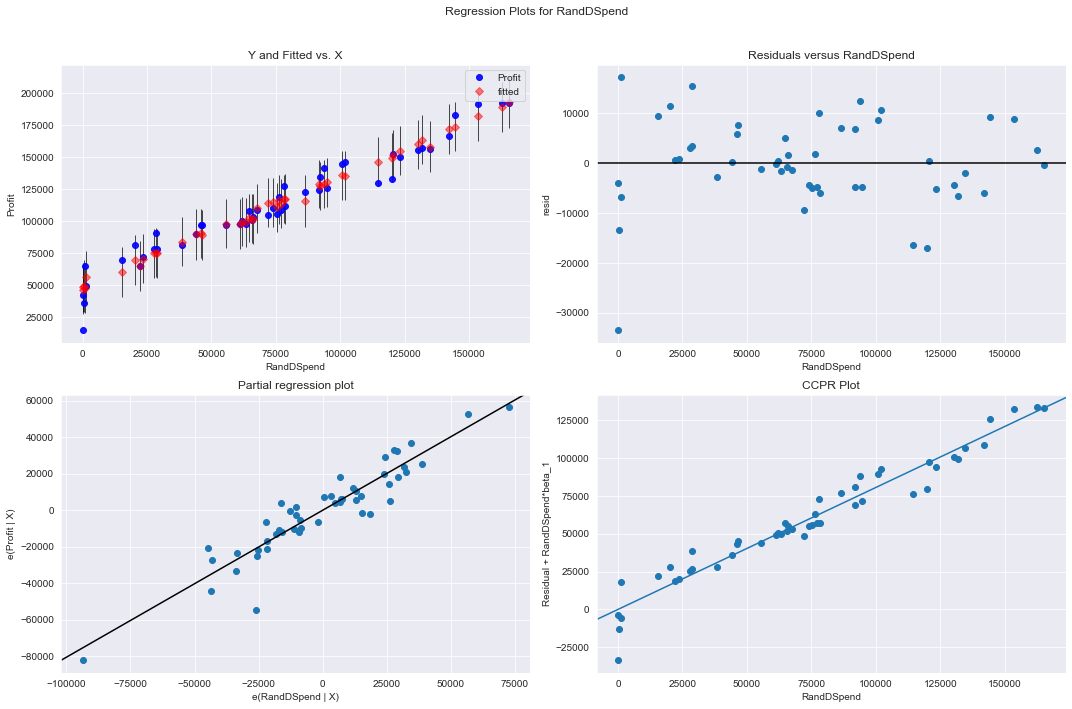

In [24]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(startups1_model, 'RandDSpend', fig = fig)
plt.show()

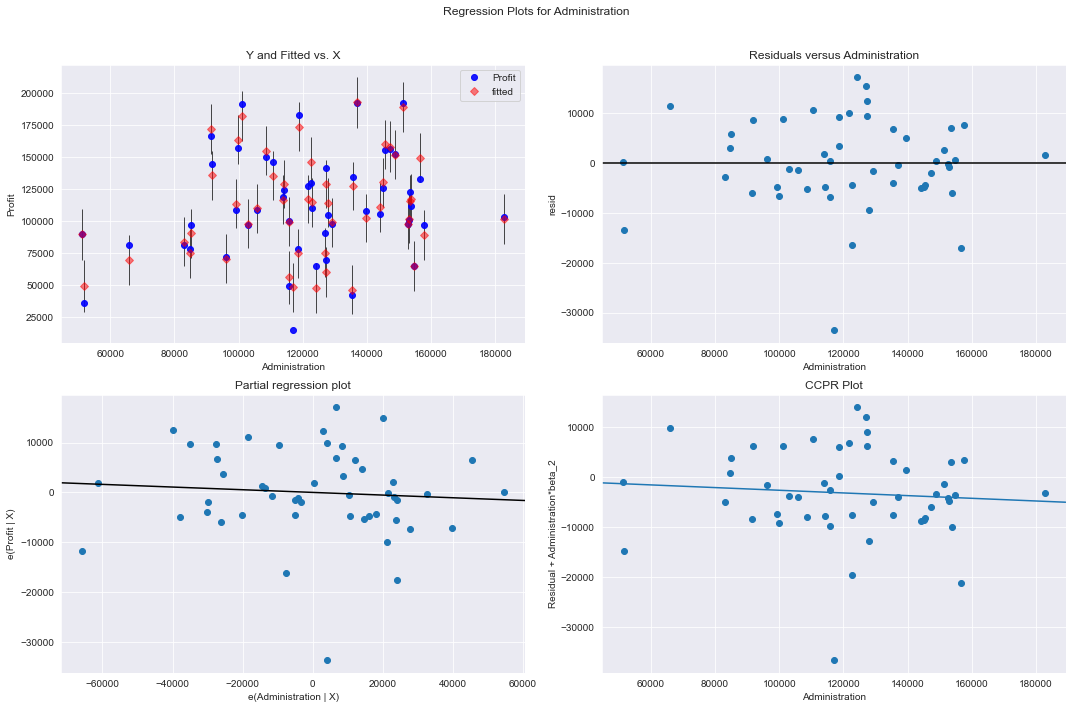

In [25]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(startups1_model, 'Administration', fig = fig)
plt.show()

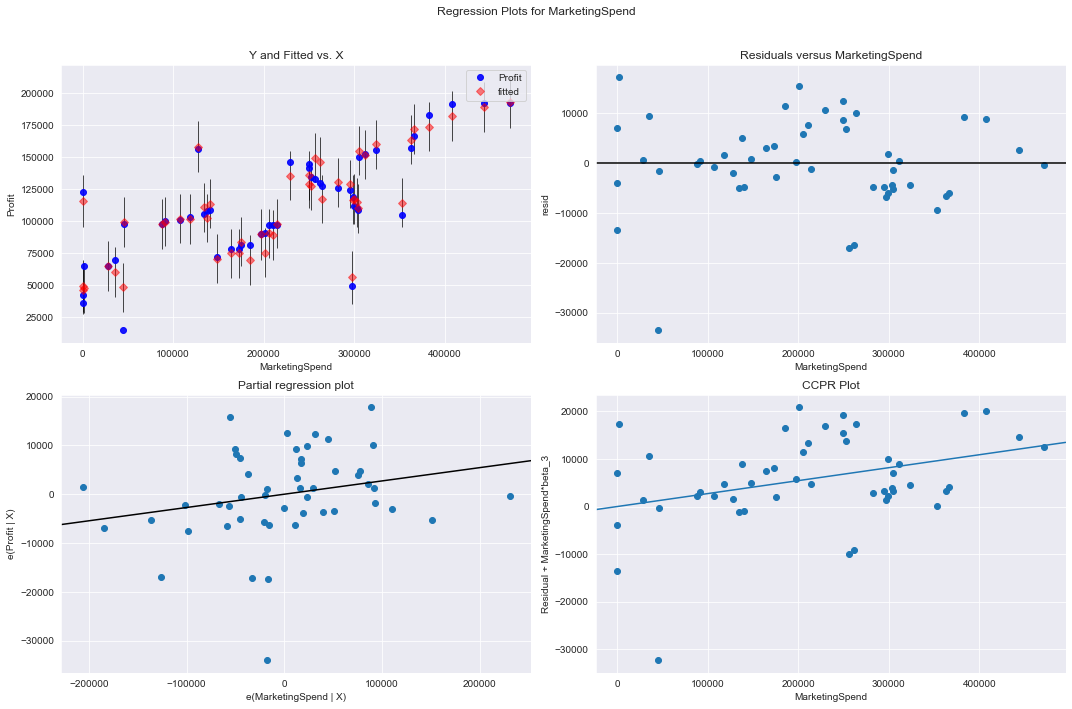

In [26]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(startups1_model, 'MarketingSpend', fig = fig)
plt.show()

### Model Detection Diagnostic

#### Cook's Distance

In [27]:
startups1_model_influence = startups1_model.get_influence()
(c, _) = startups1_model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

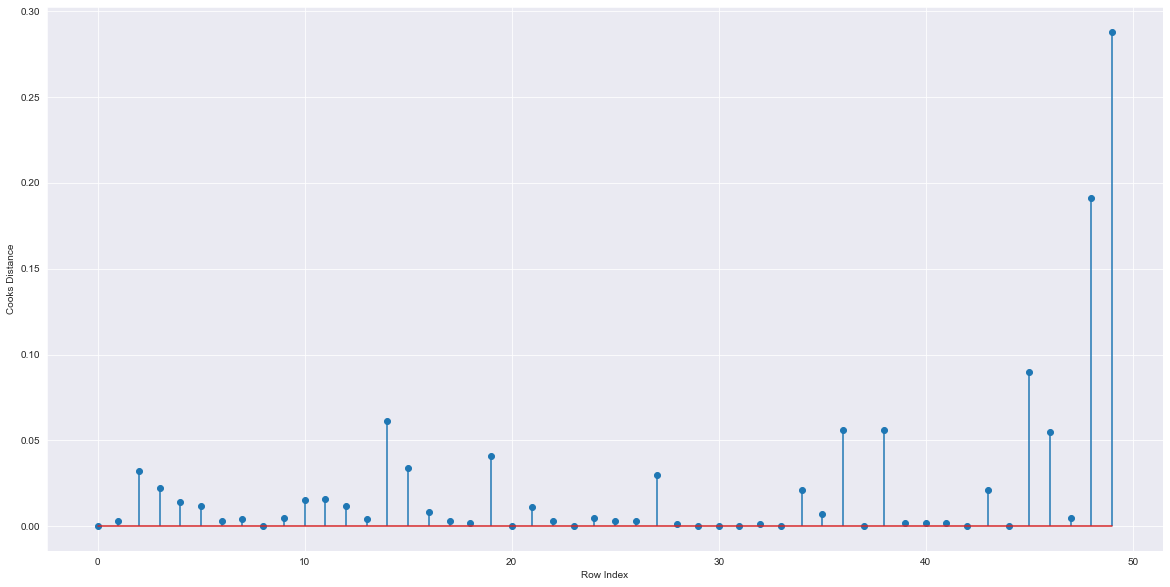

In [28]:
fig = plt.subplots(figsize = (20,10))
plt.stem(np.arange(len(startups1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

#### High Influence Points

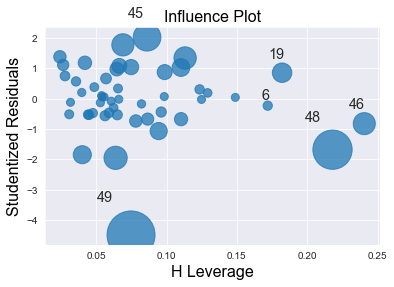

In [46]:
influence_plot(startups1_model)
plt.show()

In [30]:
k = startups1.shape[1]
n = startups1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [31]:
#no influencers

### Final Model

In [44]:
final_startups_model = smf.ols('Profit~RandDSpend+MarketingSpend', data = startups1).fit()
(final_startups_model.rsquared, final_startups_model.aic)

(0.9504503015559763, 1057.070772191826)

In [45]:
final_startups_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           2.16e-31
Time:                        21:59:36   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RandDSpend         0.7966      0.041     19.266      0.000       0.713       0.880
MarketingSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Toyota Corolla

In [47]:
data = pd.read_csv("ToyotaCorolla.csv")
data.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [48]:
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [49]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [51]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

### Correlation Matrix

In [52]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


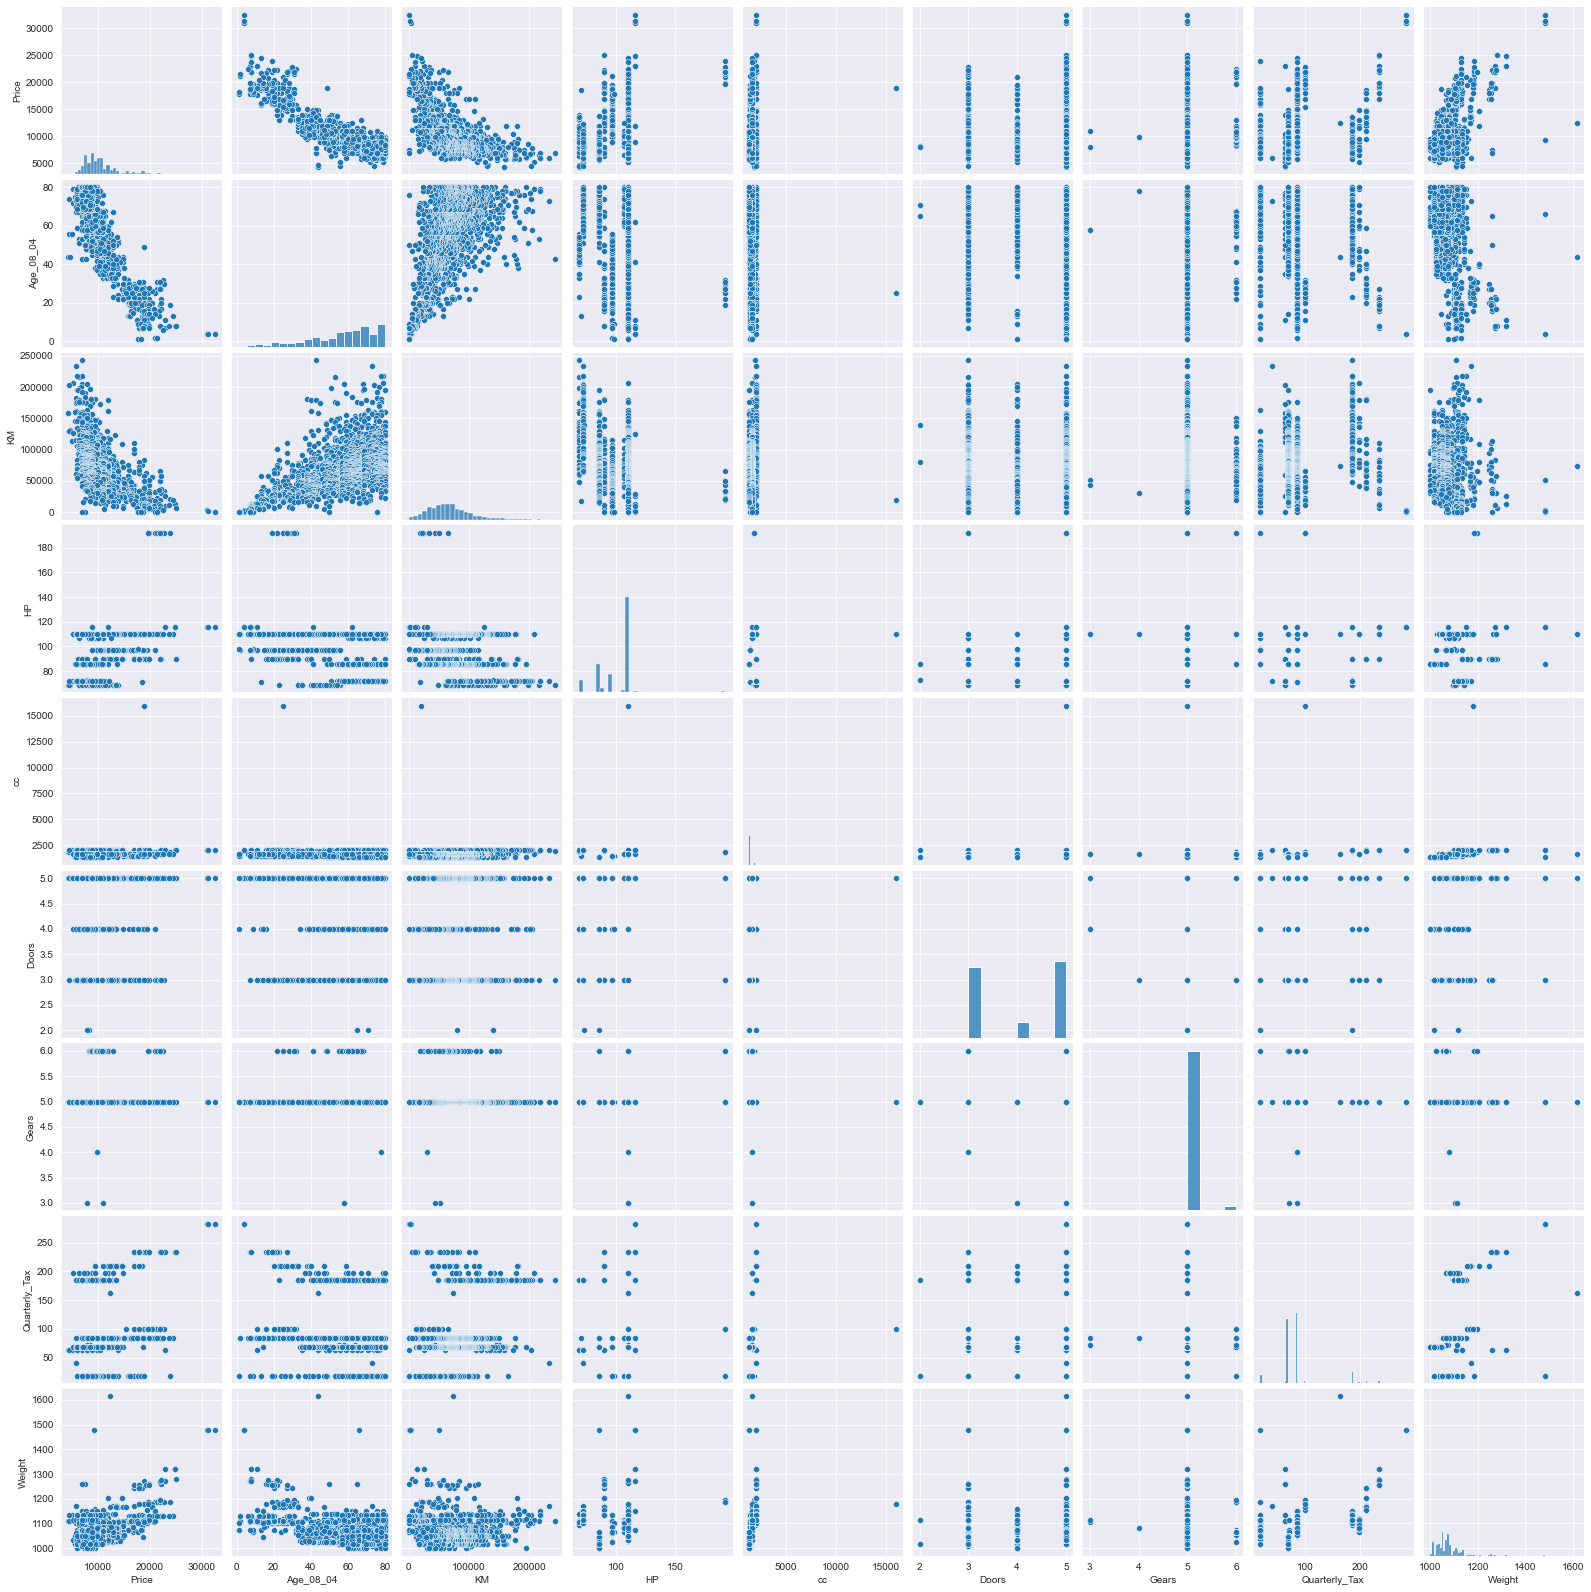

In [53]:
sns.pairplot(data)

### Preparing a model

In [54]:
data_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = data).fit()
data_model.rsquared

0.8637627463428191

In [55]:
data_model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [56]:
data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:00:28   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression

In [57]:
data_model_D = smf.ols('Price~Doors', data = data).fit()
print(data_model_D.tvalues, '\n', data_model_D.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [58]:
data_model_D.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.46e-12
Time:                        22:00:35   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
data_model_KM = smf.ols('Price~KM+Doors', data = data).fit()
print(data_model_KM.tvalues, '\n', data_model_KM.pvalues)

Intercept    32.374684
KM          -26.505007
Doors         7.750066
dtype: float64 
 Intercept    4.962430e-173
KM           2.668432e-126
Doors         1.729168e-14
dtype: float64


In [60]:
data_model_KM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     389.2
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          9.69e-136
Time:                        22:00:36   Log-Likelihood:                -13495.
No. Observations:                1436   AIC:                         2.700e+04
Df Residuals:                    1433   BIC:                         2.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.194e+04    368.691     32.375      0.000    1.12e+04    1.27e+04
KM            -0.0545      0.002    -26.505      0.000      -0.059      -0.051
Doors        627.8377     81.011      7.750      0.000     468.926     786.750
==============================================================================
Omnibus:                      385.757   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.718
Skew:                           1.379   Prob(JB):                    9.48e-235
Kurtosis:                       6.225   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
data_model_cc = smf.ols('Price~cc', data = data).fit()
print(data_model_cc.tvalues, '\n', data_model_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [62]:
data_model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.55e-06
Time:                        22:00:39   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
data_model_KMD = smf.ols('Price~KM+Doors', data = data).fit()
print(data_model_KMD.tvalues, '\n', data_model_KMD.pvalues)

Intercept    32.374684
KM          -26.505007
Doors         7.750066
dtype: float64 
 Intercept    4.962430e-173
KM           2.668432e-126
Doors         1.729168e-14
dtype: float64


In [64]:
data_model_KMD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     389.2
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          9.69e-136
Time:                        22:00:40   Log-Likelihood:                -13495.
No. Observations:                1436   AIC:                         2.700e+04
Df Residuals:                    1433   BIC:                         2.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.194e+04    368.691     32.375      0.000    1.12e+04    1.27e+04
KM            -0.0545      0.002    -26.505      0.000      -0.059      -0.051
Doors        627.8377     81.011      7.750      0.000     468.926     786.750
==============================================================================
Omnibus:                      385.757   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.718
Skew:                           1.379   Prob(JB):                    9.48e-235
Kurtosis:                       6.225   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
data_model_ccD = smf.ols('Price~cc+Doors', data = data).fit()
print(data_model_ccD.tvalues, '\n', data_model_ccD.pvalues)

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


In [66]:
data_model_ccD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.15e-15
Time:                        22:00:41   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
data_model_KMcc = smf.ols('Price~cc+KM', data = data).fit()
print(data_model_KMcc.tvalues, '\n', data_model_KMcc.pvalues)

Intercept    38.415892
cc            8.792373
KM          -27.717751
dtype: float64 
 Intercept    1.486831e-222
cc            4.112664e-18
KM           9.466627e-136
dtype: float64


In [68]:
data_model_KMcc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     402.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.59e-139
Time:                        22:00:42   Log-Likelihood:                -13487.
No. Observations:                1436   AIC:                         2.698e+04
Df Residuals:                    1433   BIC:                         2.700e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.212e+04    315.411     38.416      0.000    1.15e+04    1.27e+04
cc             1.5972      0.182      8.792      0.000       1.241       1.954
KM            -0.0570      0.002    -27.718      0.000      -0.061      -0.053
==============================================================================
Omnibus:                      341.843   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1172.397
Skew:                           1.146   Prob(JB):                    2.61e-255
Kurtosis:                       6.787   Cond. No.                     3.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF

In [69]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = data).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = data).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data = data).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight', data = data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_D = smf.ols('Doors~Age_08_04+HP+KM+cc+Gears+Quarterly_Tax+Weight', data = data).fit().rsquared
vif_D = 1/(1-rsq_D)

rsq_G = smf.ols('Gears~Age_08_04+HP+KM+cc+Doors+Quarterly_Tax+Weight', data = data).fit().rsquared
vif_G = 1/(1-rsq_G)

rsq_QT = smf.ols('Quarterly_Tax~Age_08_04+HP+KM+cc+Doors+Gears+Weight', data = data).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_W = smf.ols('Weight~Age_08_04+HP+KM+cc+Doors+Gears+Quarterly_Tax', data = data).fit().rsquared
vif_W = 1/(1-rsq_W)

df = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], 'VIF':[vif_age, vif_KM, vif_HP, vif_cc, vif_D, vif_G, vif_QT, vif_W]}
vif_f = pd.DataFrame(df)
vif_f

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


### Residual Analysis

#### QQ Plot

In [70]:
import statsmodels.api as sm

<function matplotlib.pyplot.show(close=None, block=None)>

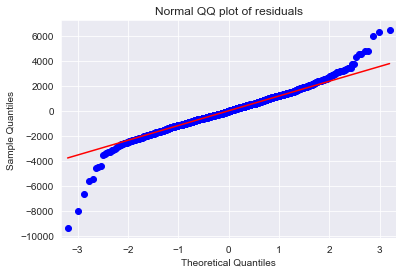

In [71]:
qqplt = sm.qqplot(data_model.resid, line = 'q')
plt.title('Normal QQ plot of residuals')
plt.show

#### Homoscadasticity

In [72]:
def get_standardized_values(i):
    return (i-i.mean())/i.std()

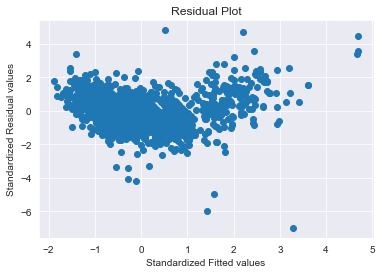

In [73]:
plt.scatter(get_standardized_values(data_model.fittedvalues), get_standardized_values(data_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
plt.show()

#### Residual vs Regressors

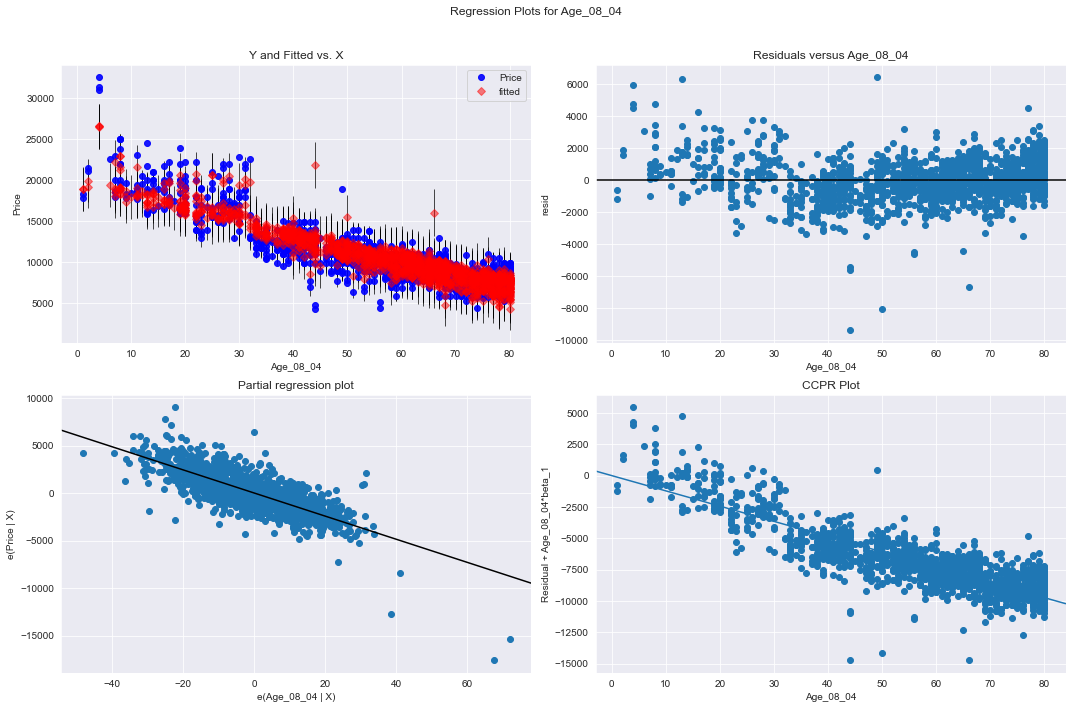

In [74]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'Age_08_04', fig =fig)
plt.show()

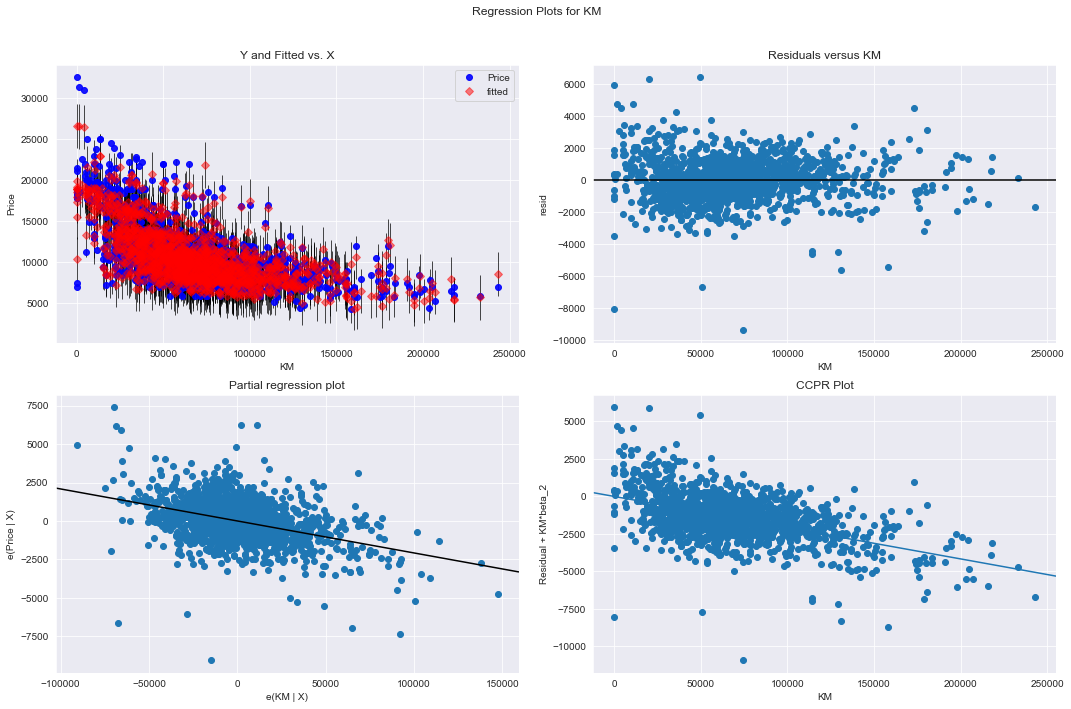

In [75]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'KM', fig =fig)
plt.show()

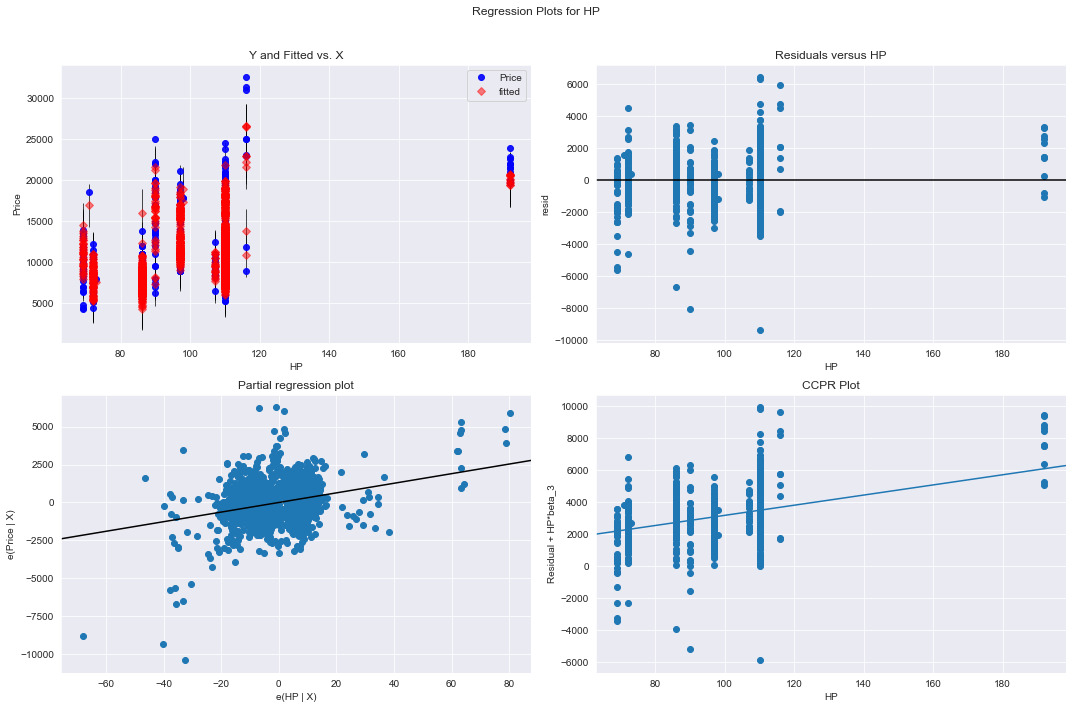

In [76]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'HP', fig =fig)
plt.show()

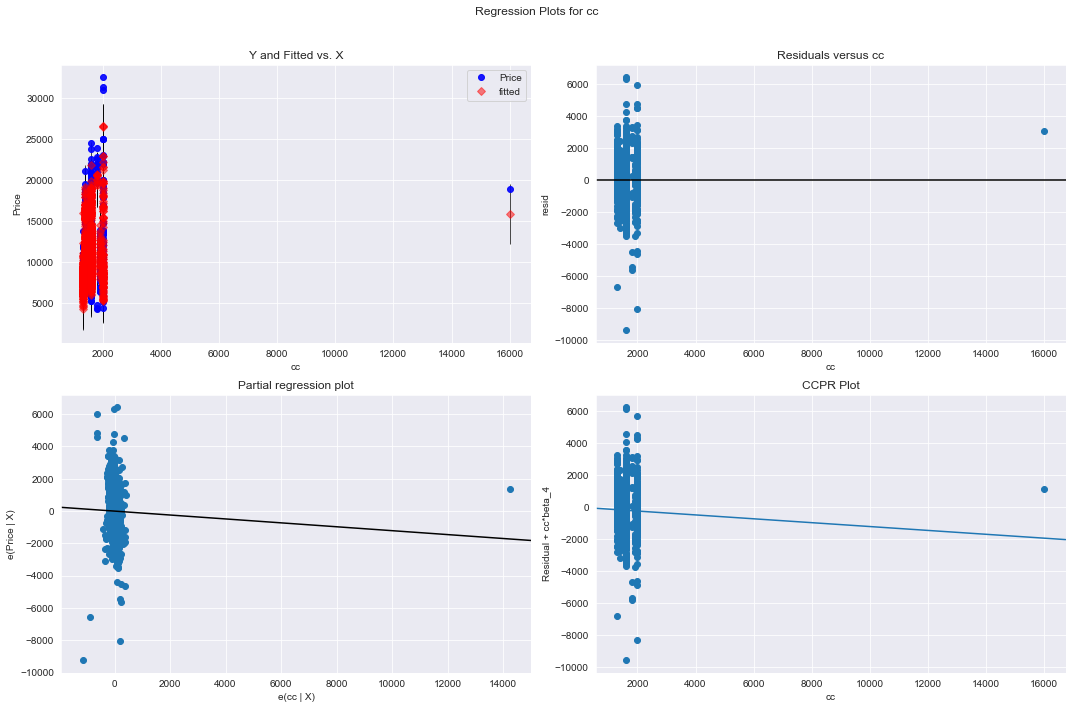

In [77]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'cc', fig =fig)
plt.show()

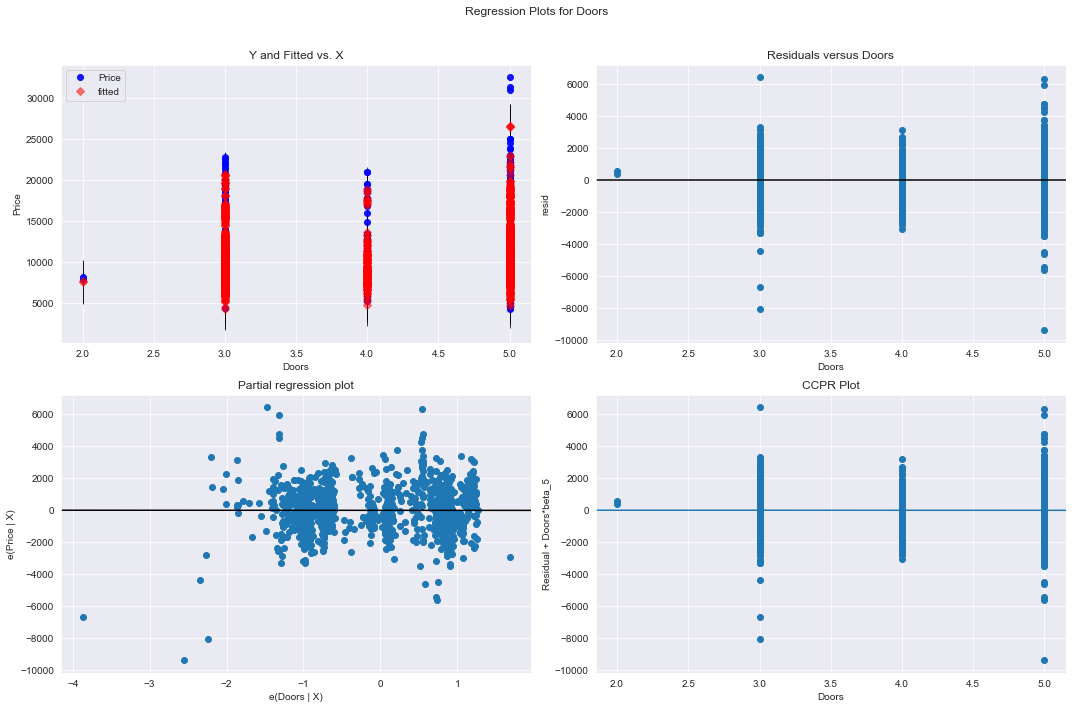

In [78]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'Doors', fig =fig)
plt.show()

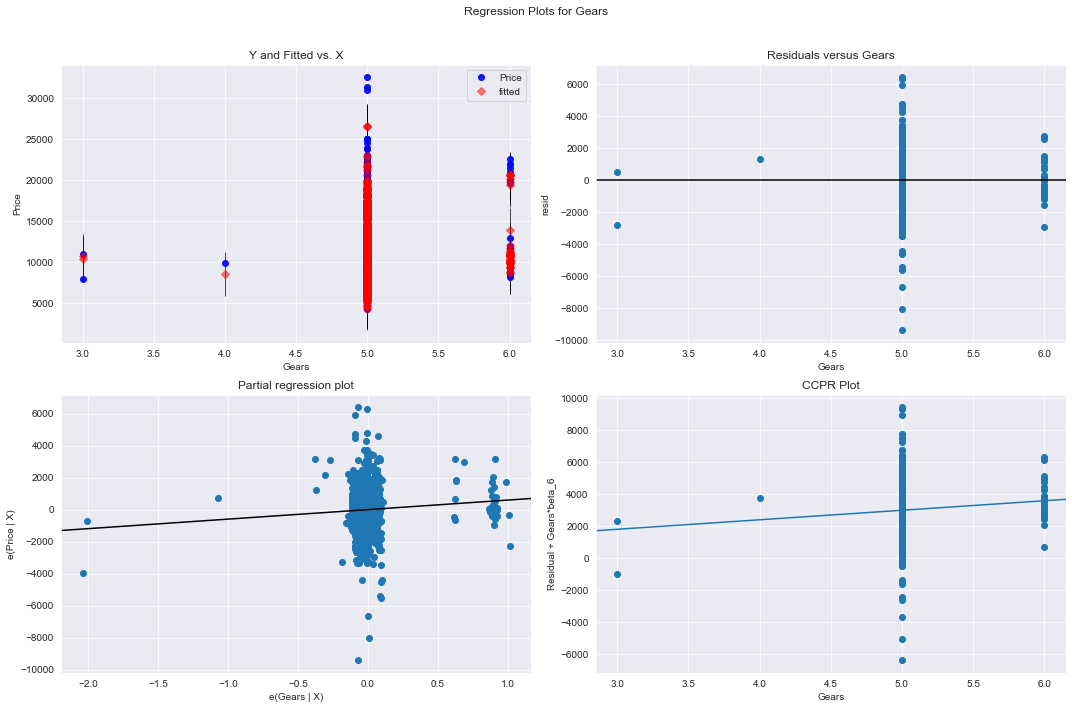

In [79]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'Gears', fig =fig)
plt.show()

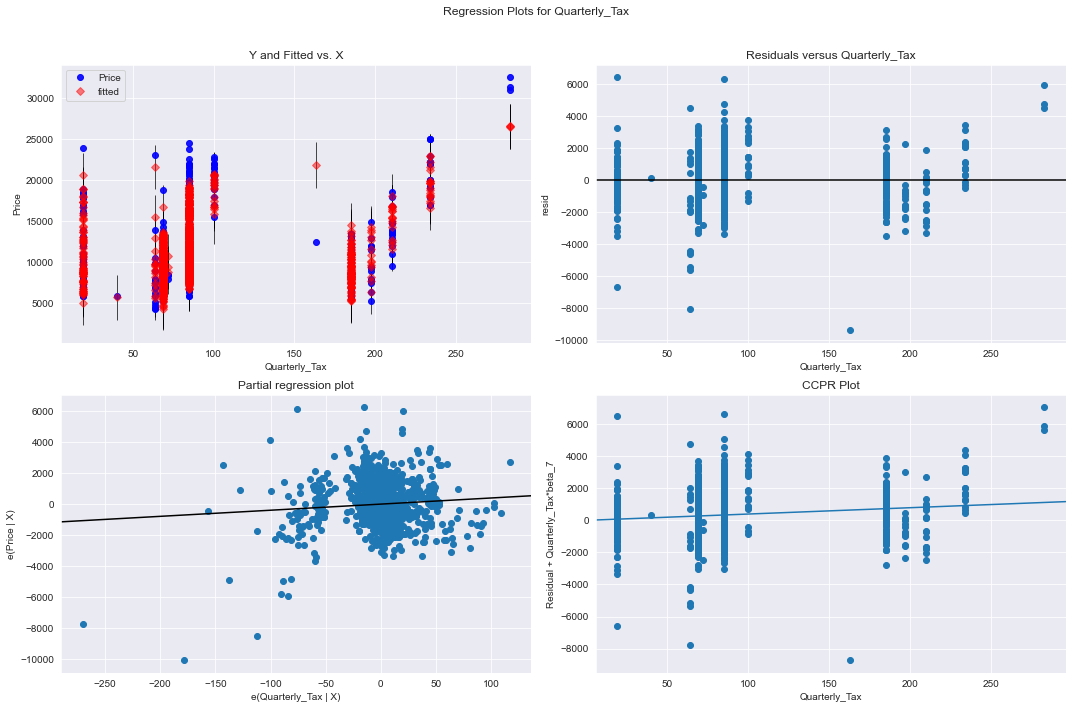

In [80]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'Quarterly_Tax', fig =fig)
plt.show()

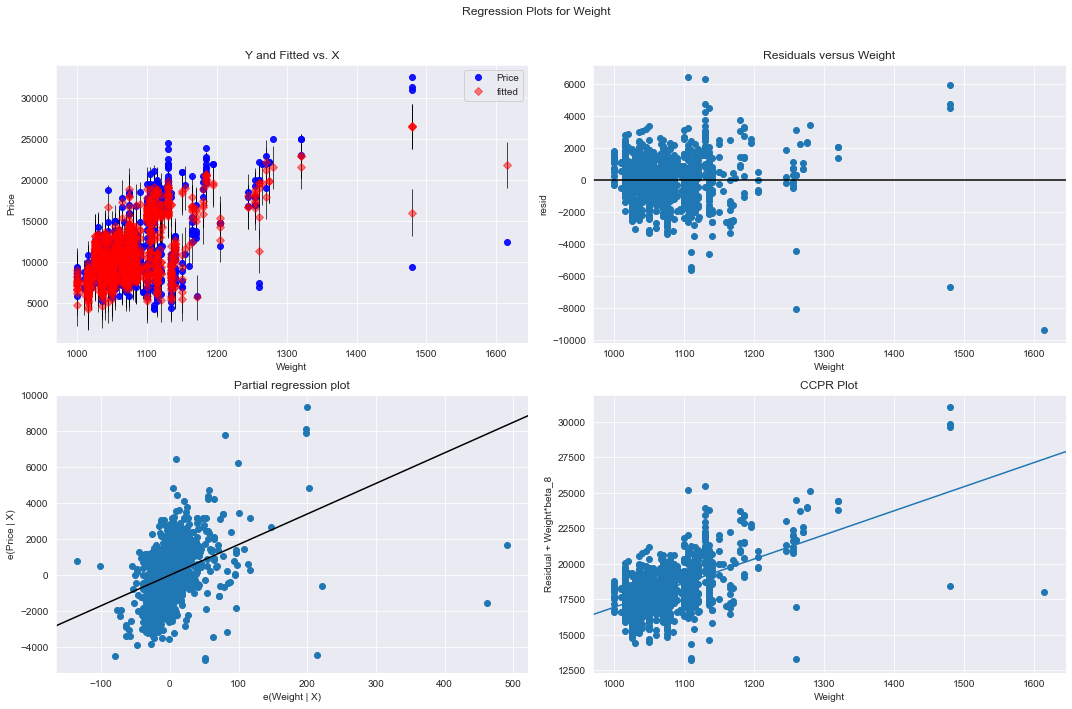

In [68]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(data_model,'Weight', fig =fig)
plt.show()

### Model Deletion Diagnostic

#### Cook's Distance

In [69]:
data_model_influence = data_model.get_influence()
(d,_) = data_model_influence.cooks_distance

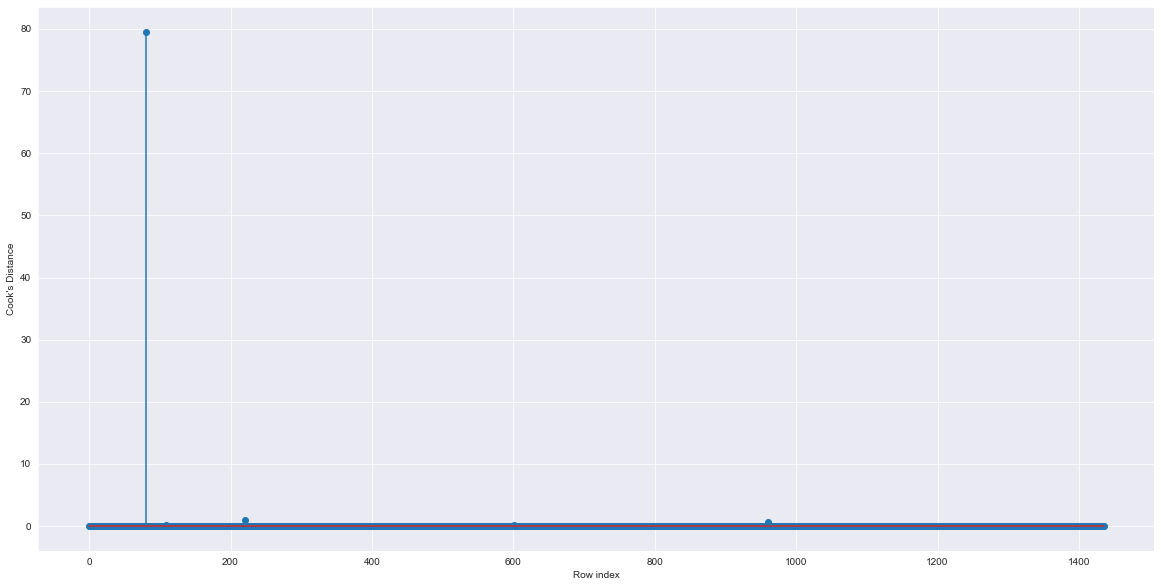

In [70]:
fig = plt.subplots(figsize = (20,10))
plt.stem(np.arange(len(data)), np.round(d,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### High Influence Points

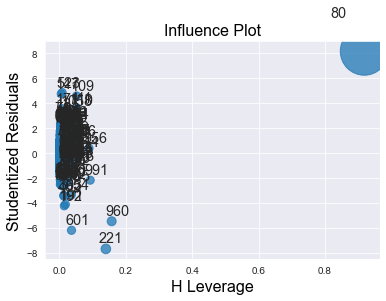

In [71]:
influence_plot(data_model)
plt.show()

In [132]:
data[data.index.isin([80,221,601,960])]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,1,2001,74172,Petrol,110,1,...,1,1,1,0,0,0,1,0,0,0
601,605,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,7,2000,1,Diesel,90,1,...,1,1,1,1,0,0,0,1,1,1
960,964,TOYOTA Corolla,9390,66,3,1999,50806,Petrol,86,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
data_new = data

In [133]:
data1 = data_new.drop(data_new.index[[80,221,601,960]],axis = 0).reset_index()

In [136]:
data_final_model = smf.ols('Price~Age_08_04+HP+KM+cc+Gears+Quarterly_Tax+Weight', data = data1).fit()
data_final_model.params

Intercept       -15836.975031
Age_08_04         -110.847585
HP                  33.622867
KM                  -0.017935
cc                  -3.541426
Gears              601.592446
Quarterly_Tax        4.118928
Weight              30.563744
dtype: float64

In [137]:
data_final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1617.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:18:34   Log-Likelihood:                -12198.
No. Observations:                1432   AIC:                         2.441e+04
Df Residuals:                    1424   BIC:                         2.445e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.584e+04   1423.927    -11.122      0.000   -1.86e+04    -1.3e+04
Age_08_04      -110.8476      2.452    -45.203      0.000    -115.658    -106.037
HP               33.6229      2.720     12.361      0.000      28.287      38.959
KM               -0.0179      0.001    -15.124      0.000      -0.020      -0.016
cc               -3.5414      0.296    -11.964      0.000      -4.122      -2.961
Gears           601.5924    175.173      3.434      0.001     257.967     945.218
Quarterly_Tax     4.1189      1.364      3.020      0.003       1.444       6.794
Weight           30.5637      1.219     25.063      0.000      28.172      32.956
==============================================================================
Omnibus:                       69.053   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.813
Skew:                           0.116   Prob(JB):                     3.06e-48
Kurtosis:                       4.901   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""